In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches

In [2]:
sheet1=pd.read_excel(r'D:\Personal Folders\Desktop\ShuWeiCup_ProblemB\Annex1：node＆link.xlsx',sheet_name='Sheet1')
sheet2=pd.read_excel(r'D:\Personal Folders\Desktop\ShuWeiCup_ProblemB\Annex1：node＆link.xlsx',sheet_name='Sheet2')
nodes=np.array(sheet1)
red=nodes[nodes[:,3]=='red']
blue=nodes[nodes[:,3]=='blue']
lines=np.array(sheet2)

In [3]:
#1前线纵坐标的确定
side=0
sidenum=0
for i in range(lines.shape[0]):
    if(nodes[lines[i,1].astype('int')-1,3]!=nodes[lines[i,2].astype('int')-1,3]):
        side+=nodes[lines[i,1].astype('int')-1,2]+nodes[lines[i,2].astype('int')-1,2]
        sidenum+=2
side=side/sidenum


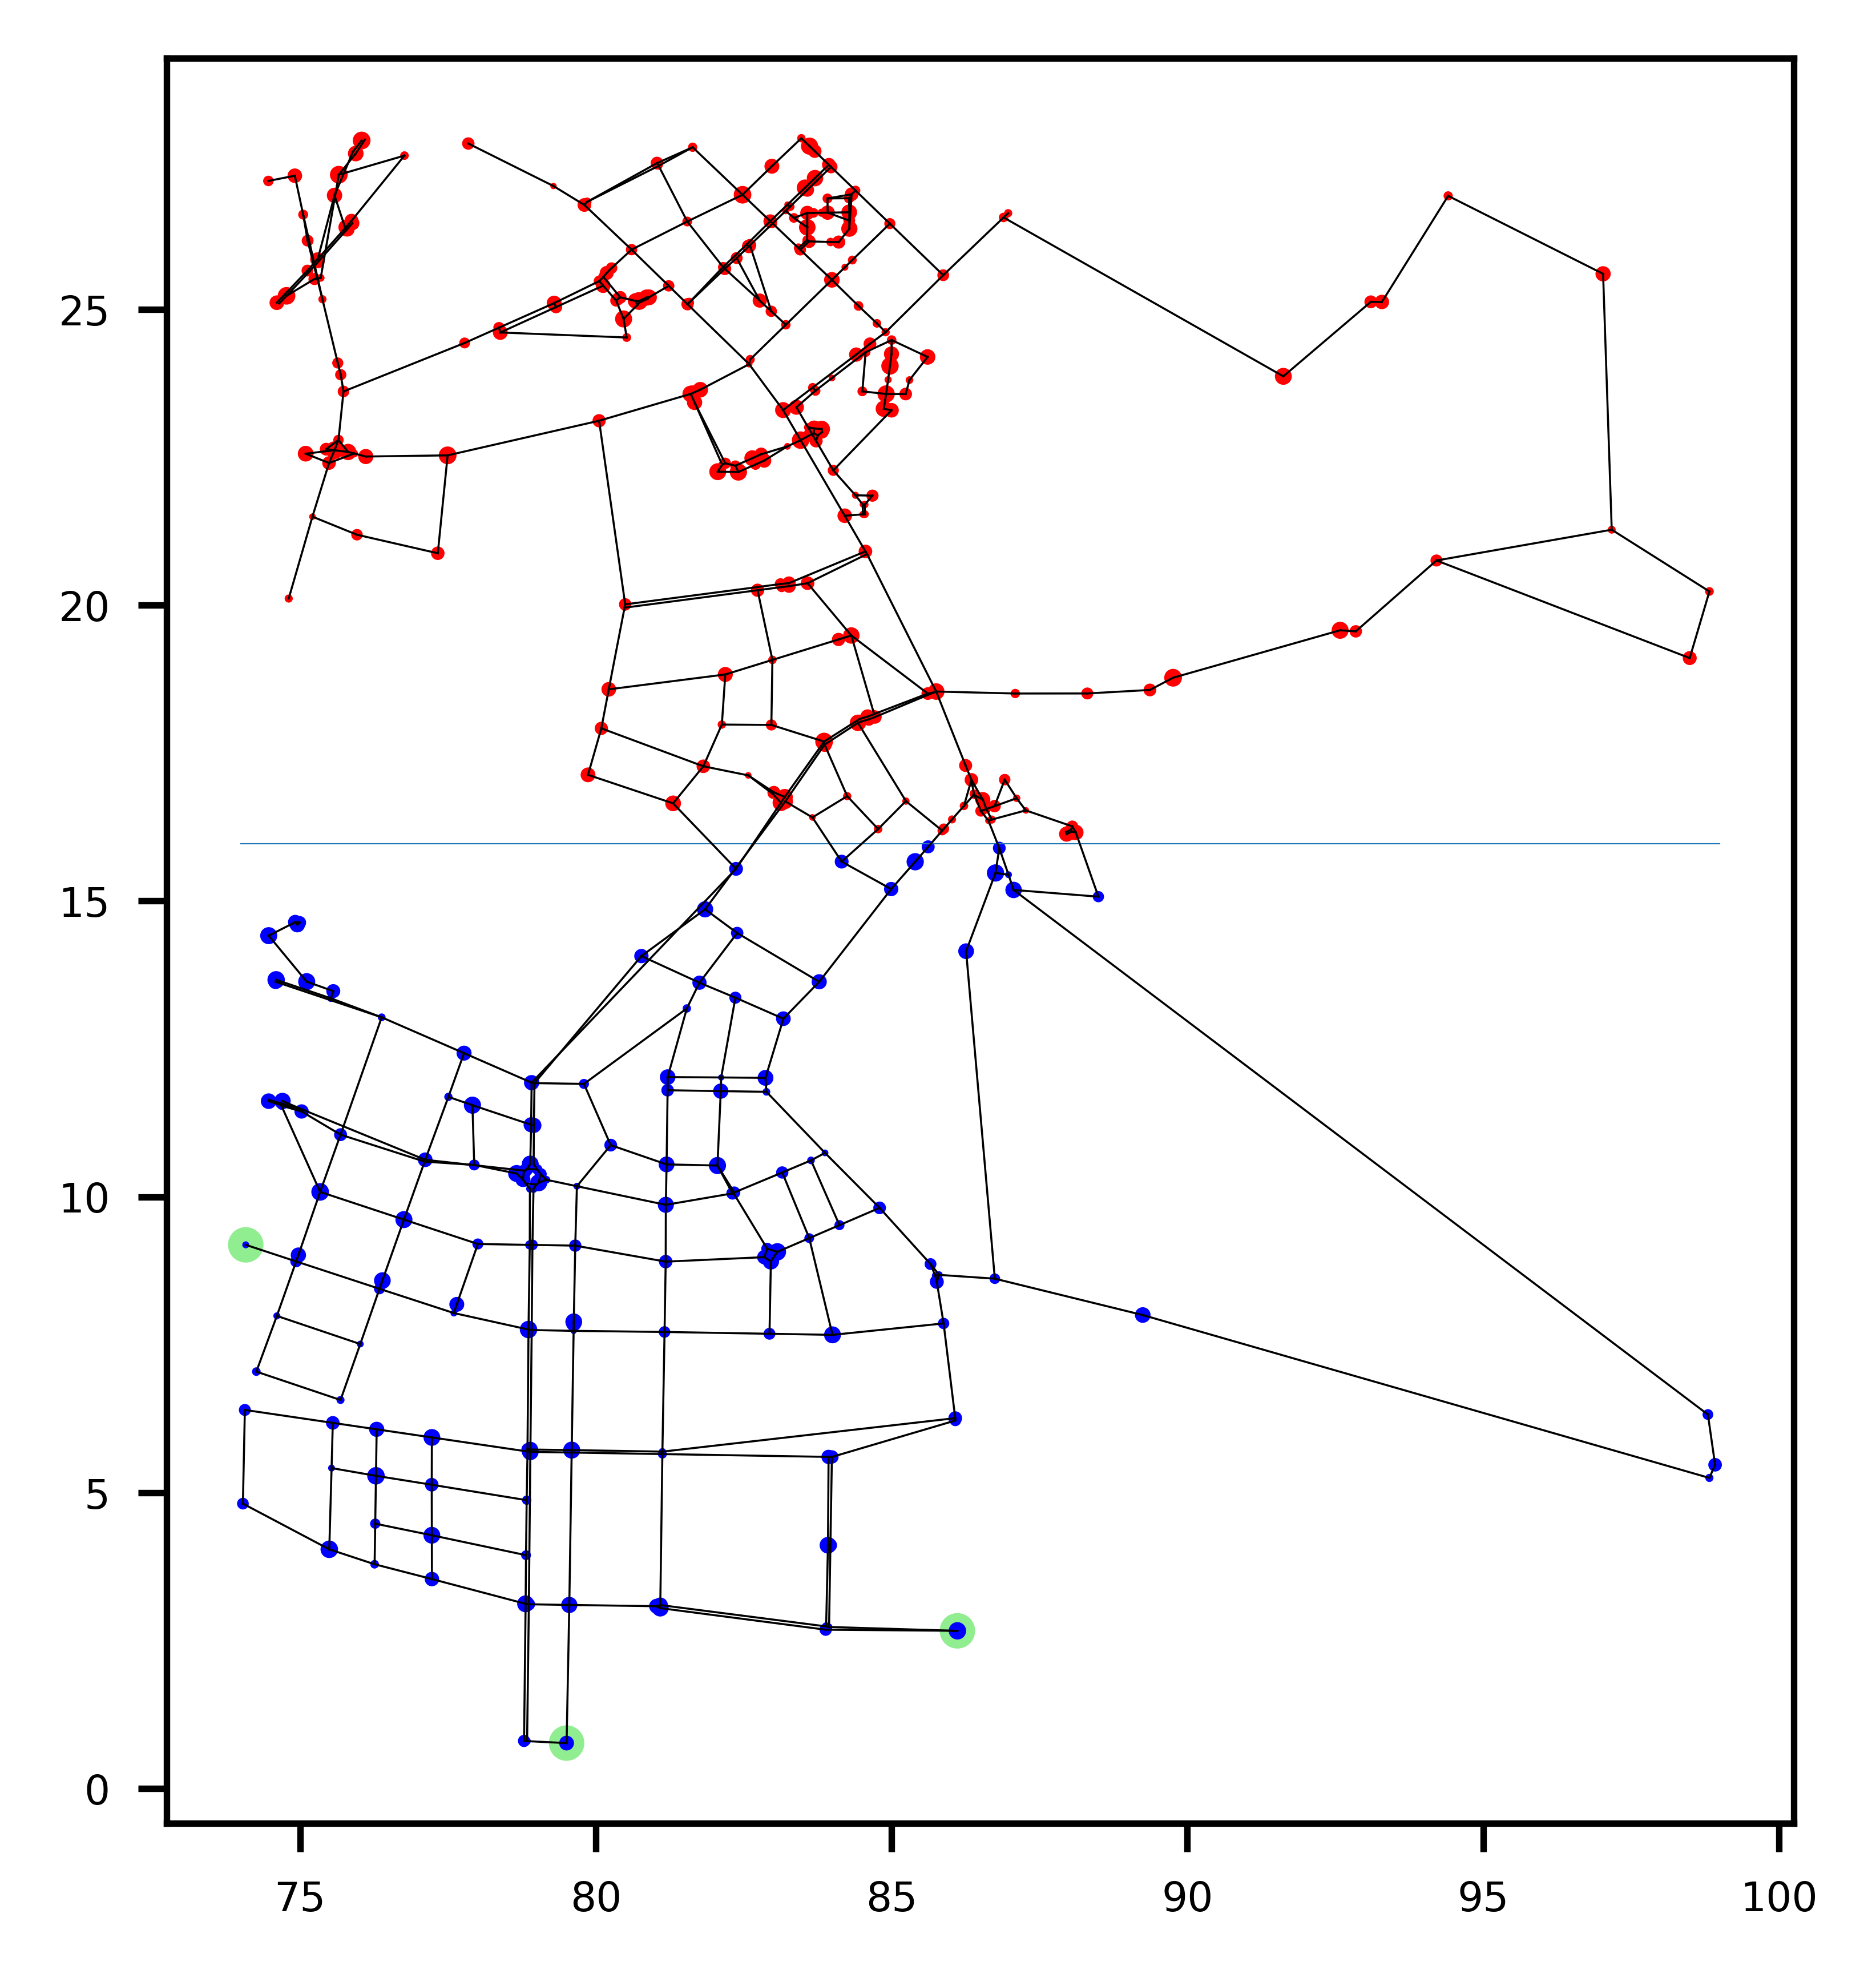

In [4]:
fig,ax=plt.subplots(1,1,dpi=1024)
#plt.title("Feature importances", fontsize=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
ax.set_aspect('equal')

ax.plot(np.arange(74,100,step=1),np.full(26,side),'-',linewidth=0.15)

ax.add_artist(patches.Circle((nodes[139,1],nodes[139,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[36,1],nodes[36,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[377,1],nodes[377,2]),radius=0.3,facecolor='lightgreen'))
for i in range(red.shape[0]):
    ax.add_artist(patches.Circle((red[i,1],red[i,2]),radius=0.05+red[i,4]/10,facecolor='red'))
for i in range(blue.shape[0]):
    ax.add_artist(patches.Circle((blue[i,1],blue[i,2]),radius=0.05+blue[i,4]/10,facecolor='blue'))
for i in range(lines.shape[0]):
    ax.plot(nodes[lines[i,1:3].astype('int')-1,1],nodes[lines[i,1:3].astype('int')-1,2],'-',color='black',linewidth=0.25)
#ax.plot(red[:,1],red[:,2],'.',color='red')
#ax.plot(blue[:,1],blue[:,2],'.',color='blue')
plt.show()

In [5]:
#所有节点连线的平均长度（实际）
average=np.mean(lines[:,3])
print(average)

5.518364510779437


In [6]:
def distance(node1,node2):
    return np.linalg.norm(node1-node2)

In [7]:
def closest_node(node,red_node,blue_node,choose='red'):
    temp=[]
    if(choose=='red'):
        for i in range(red_node.shape[0]):
            temp=np.append(temp,distance(node,red_node[i,1:3]))
    if(choose=='blue'):
        for i in range(blue_node.shape[0]):
            temp=np.append(temp,distance(node,blue_node[i,1:3]))
    return np.argmin(temp),temp

In [8]:
#图上距离比实际距离的平均值

tempp=0
for i in range(lines.shape[0]):
    tempp+=distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3]
    #print(distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3])
ratio=tempp/lines.shape[0]
print(ratio)


0.1491574713360896


In [9]:
def cost_func(centroids,X,idx,side=side):
    m=X.shape[0]
    a=1
    b=1
    c=1
    d=1
    sum_distance=0
    sum_toside=0
    for i in range(X.shape[0]):
        sum_distance+=np.square(np.linalg.norm(X[i]-centroids[idx[i]]))
        sum_toside+=np.square(X[i,1]-side)
    return a/m*sum_distance+0.01/m*sum_toside


In [10]:
def draw_line(p1, p2, style="-k", color='black',linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]],"-", color="black",linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', linewidths=1)
    
    # Plot the examples
    #plot_data_points(X, idx)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :],linewidth=0.3)
    
    plt.title("Iteration number %d" %i)

In [11]:
#K-Means算法实现
def kMeans(X,K,max_iters=10,plot_progress=True,side=side,a=1,b=0.1,c=-0.1,choose='red'):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    previous_centroids = centroids
    idx = np.zeros(X.shape[0], dtype=int)
    m, n = X.shape
    
    closest_id,all_distance=0,[]
    
    for i in range(max_iters):
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        #print(" Cost: %f"%cost_func(centroids,X,idx))
        
        # For each example in X, assign it to the closest centroid
        for j in range(m):
            distance=[]
            for k in range(K):
                closest_id,all_distance=closest_node(centroids[k],red,blue,choose=choose)
                index=np.argwhere(all_distance<(2*average*ratio))
                if(choose=='red'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(red[index,4]))
                if(choose=='blue'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(blue[index,4]))
            idx[j]=np.argmin(distance)

        # Optionally plot progress
        if plot_progress:
            if(i==max_iters-1):
                plot_data_points(X, idx)
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, j)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        for k in range(K):   
            points = X[idx == k]
            centroids[k] = np.mean(points, axis = 0)
    print("Cost : %f"%cost_func(centroids,X,idx))
    return centroids,idx
    

In [12]:
def judge(centroids,idx,K,choose='red'):
    sum=0
    if(choose=='red'):
        for i in range(K):
            sum+=np.sum(1/closest_node(centroids[i],red,blue,choose='red')[1])
    print(sum)

        

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 10.403010


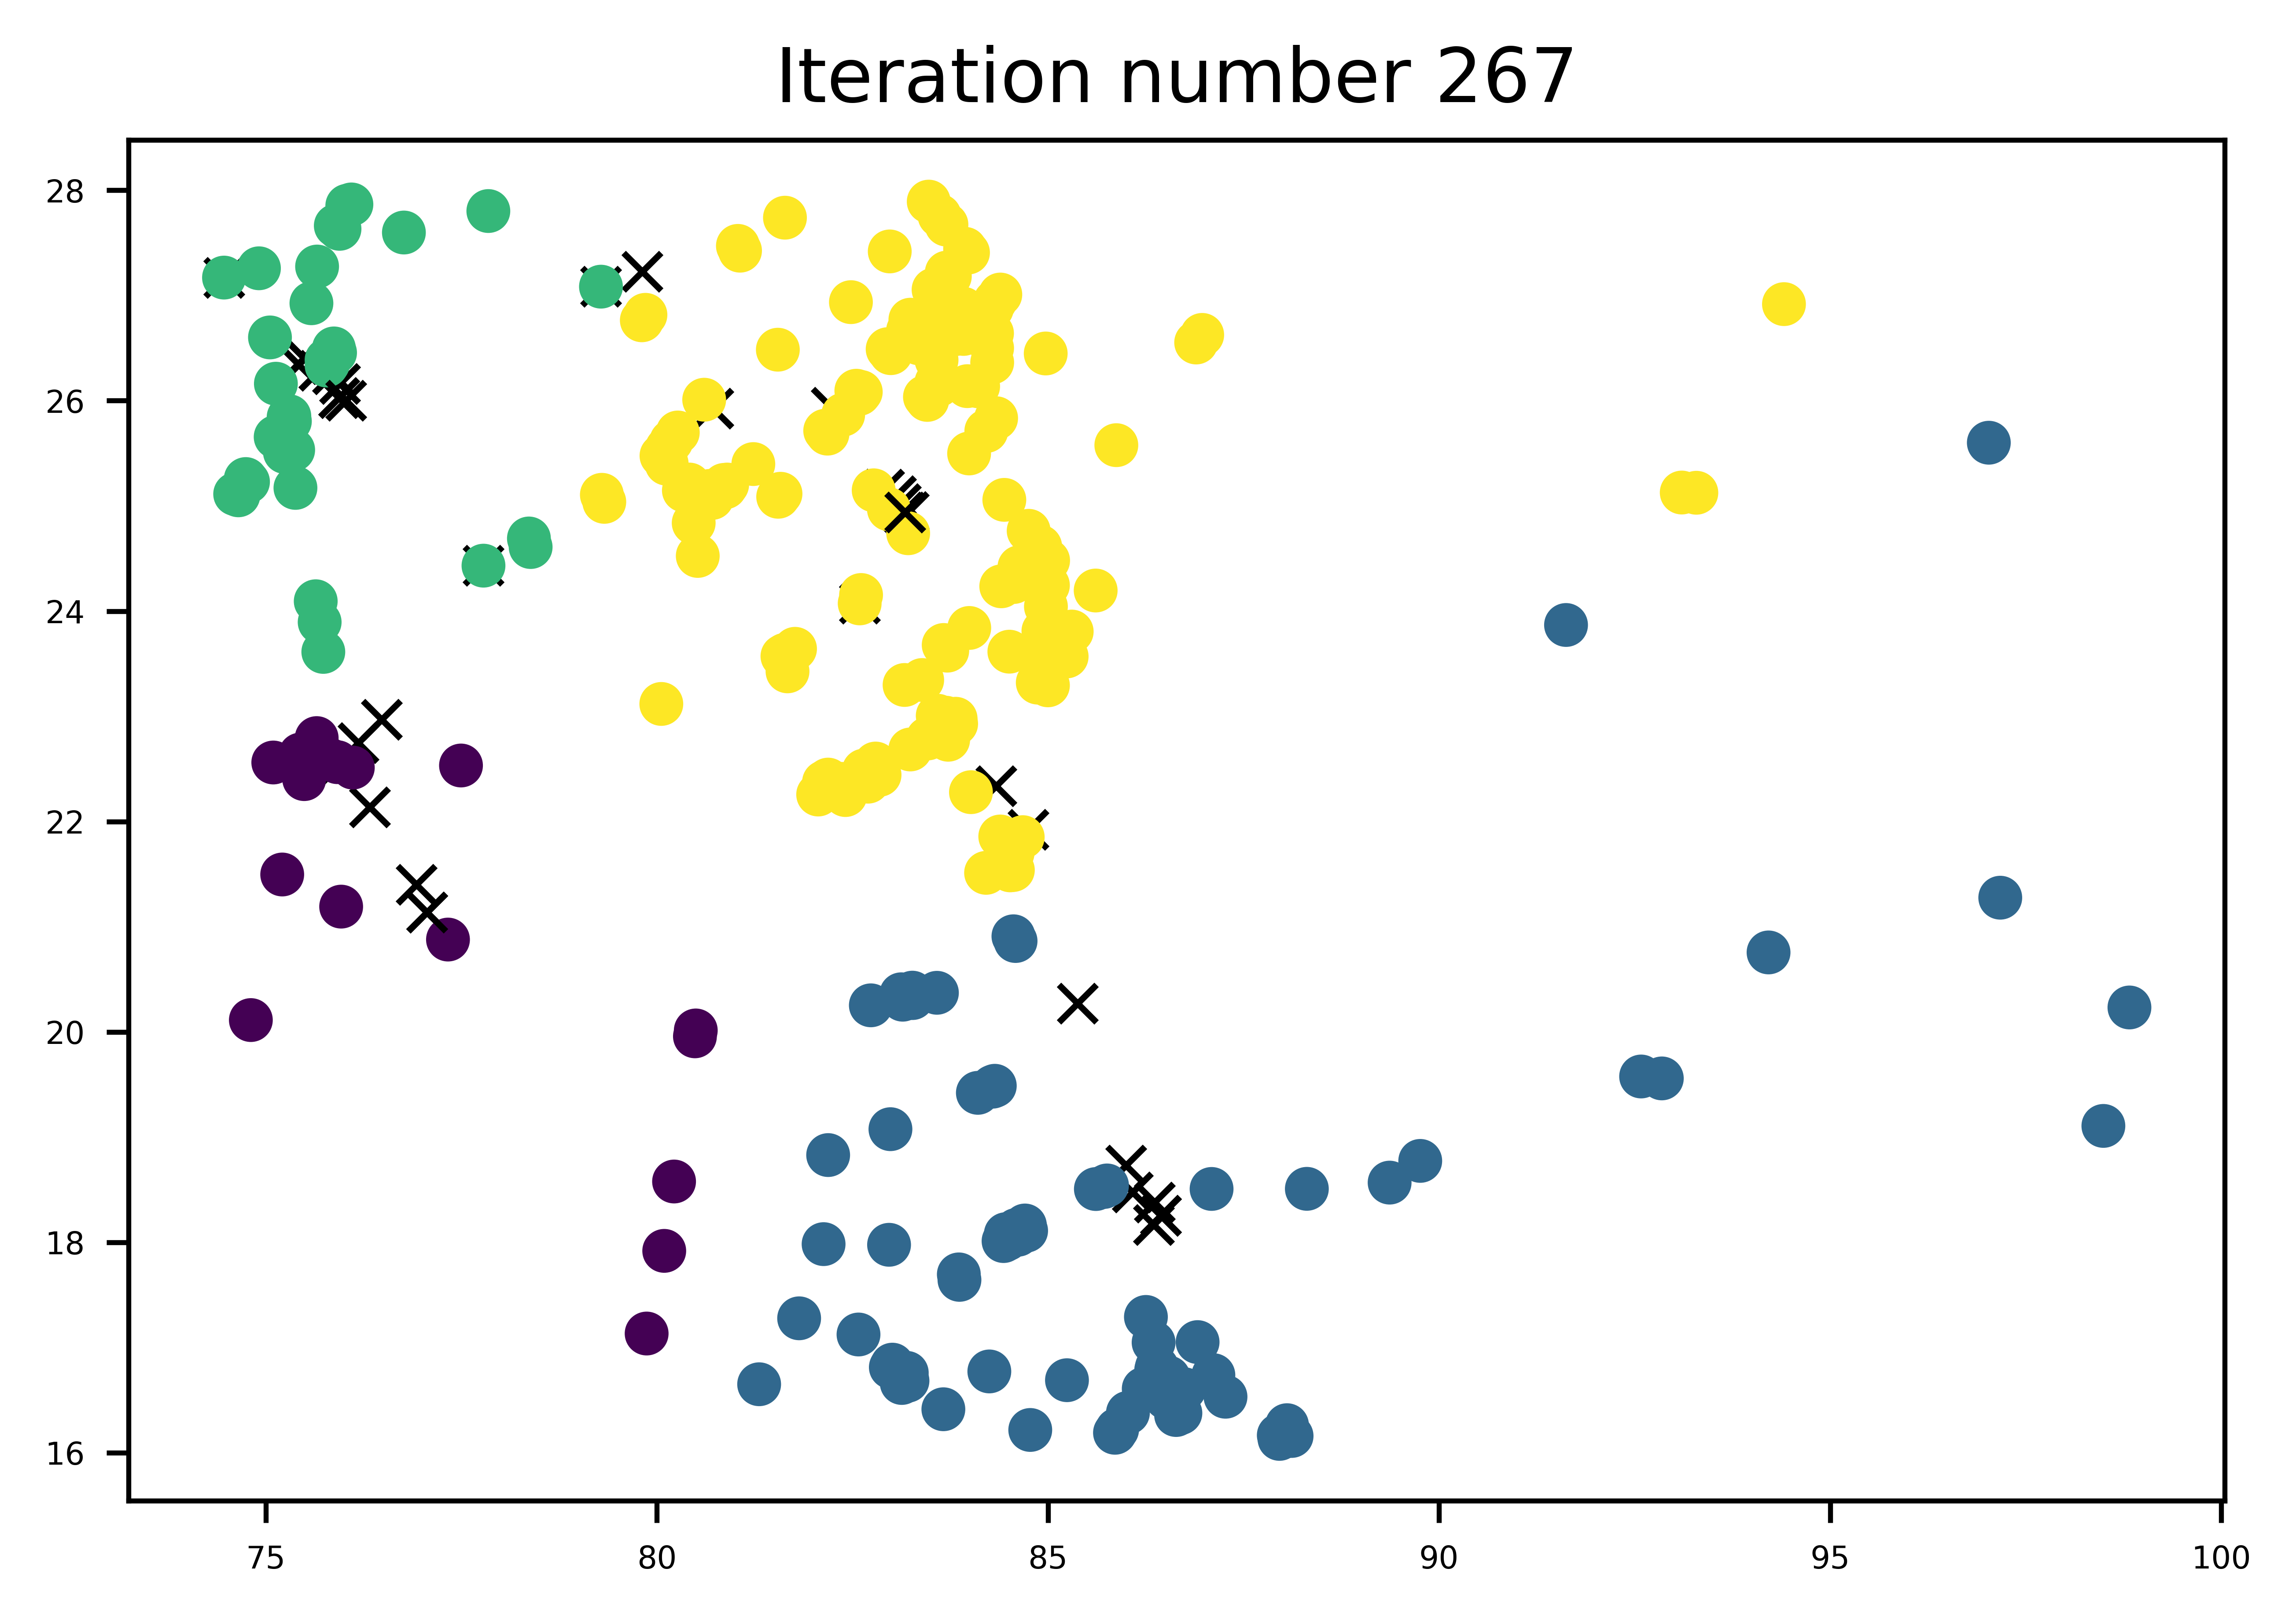

267.5515716402857


In [13]:
K_red=4
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
red_centroids, red_idx = kMeans(red[:,1:3],K_red,choose='red')
plt.show()
judge(red_centroids, red_idx,K_red)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 8.691265


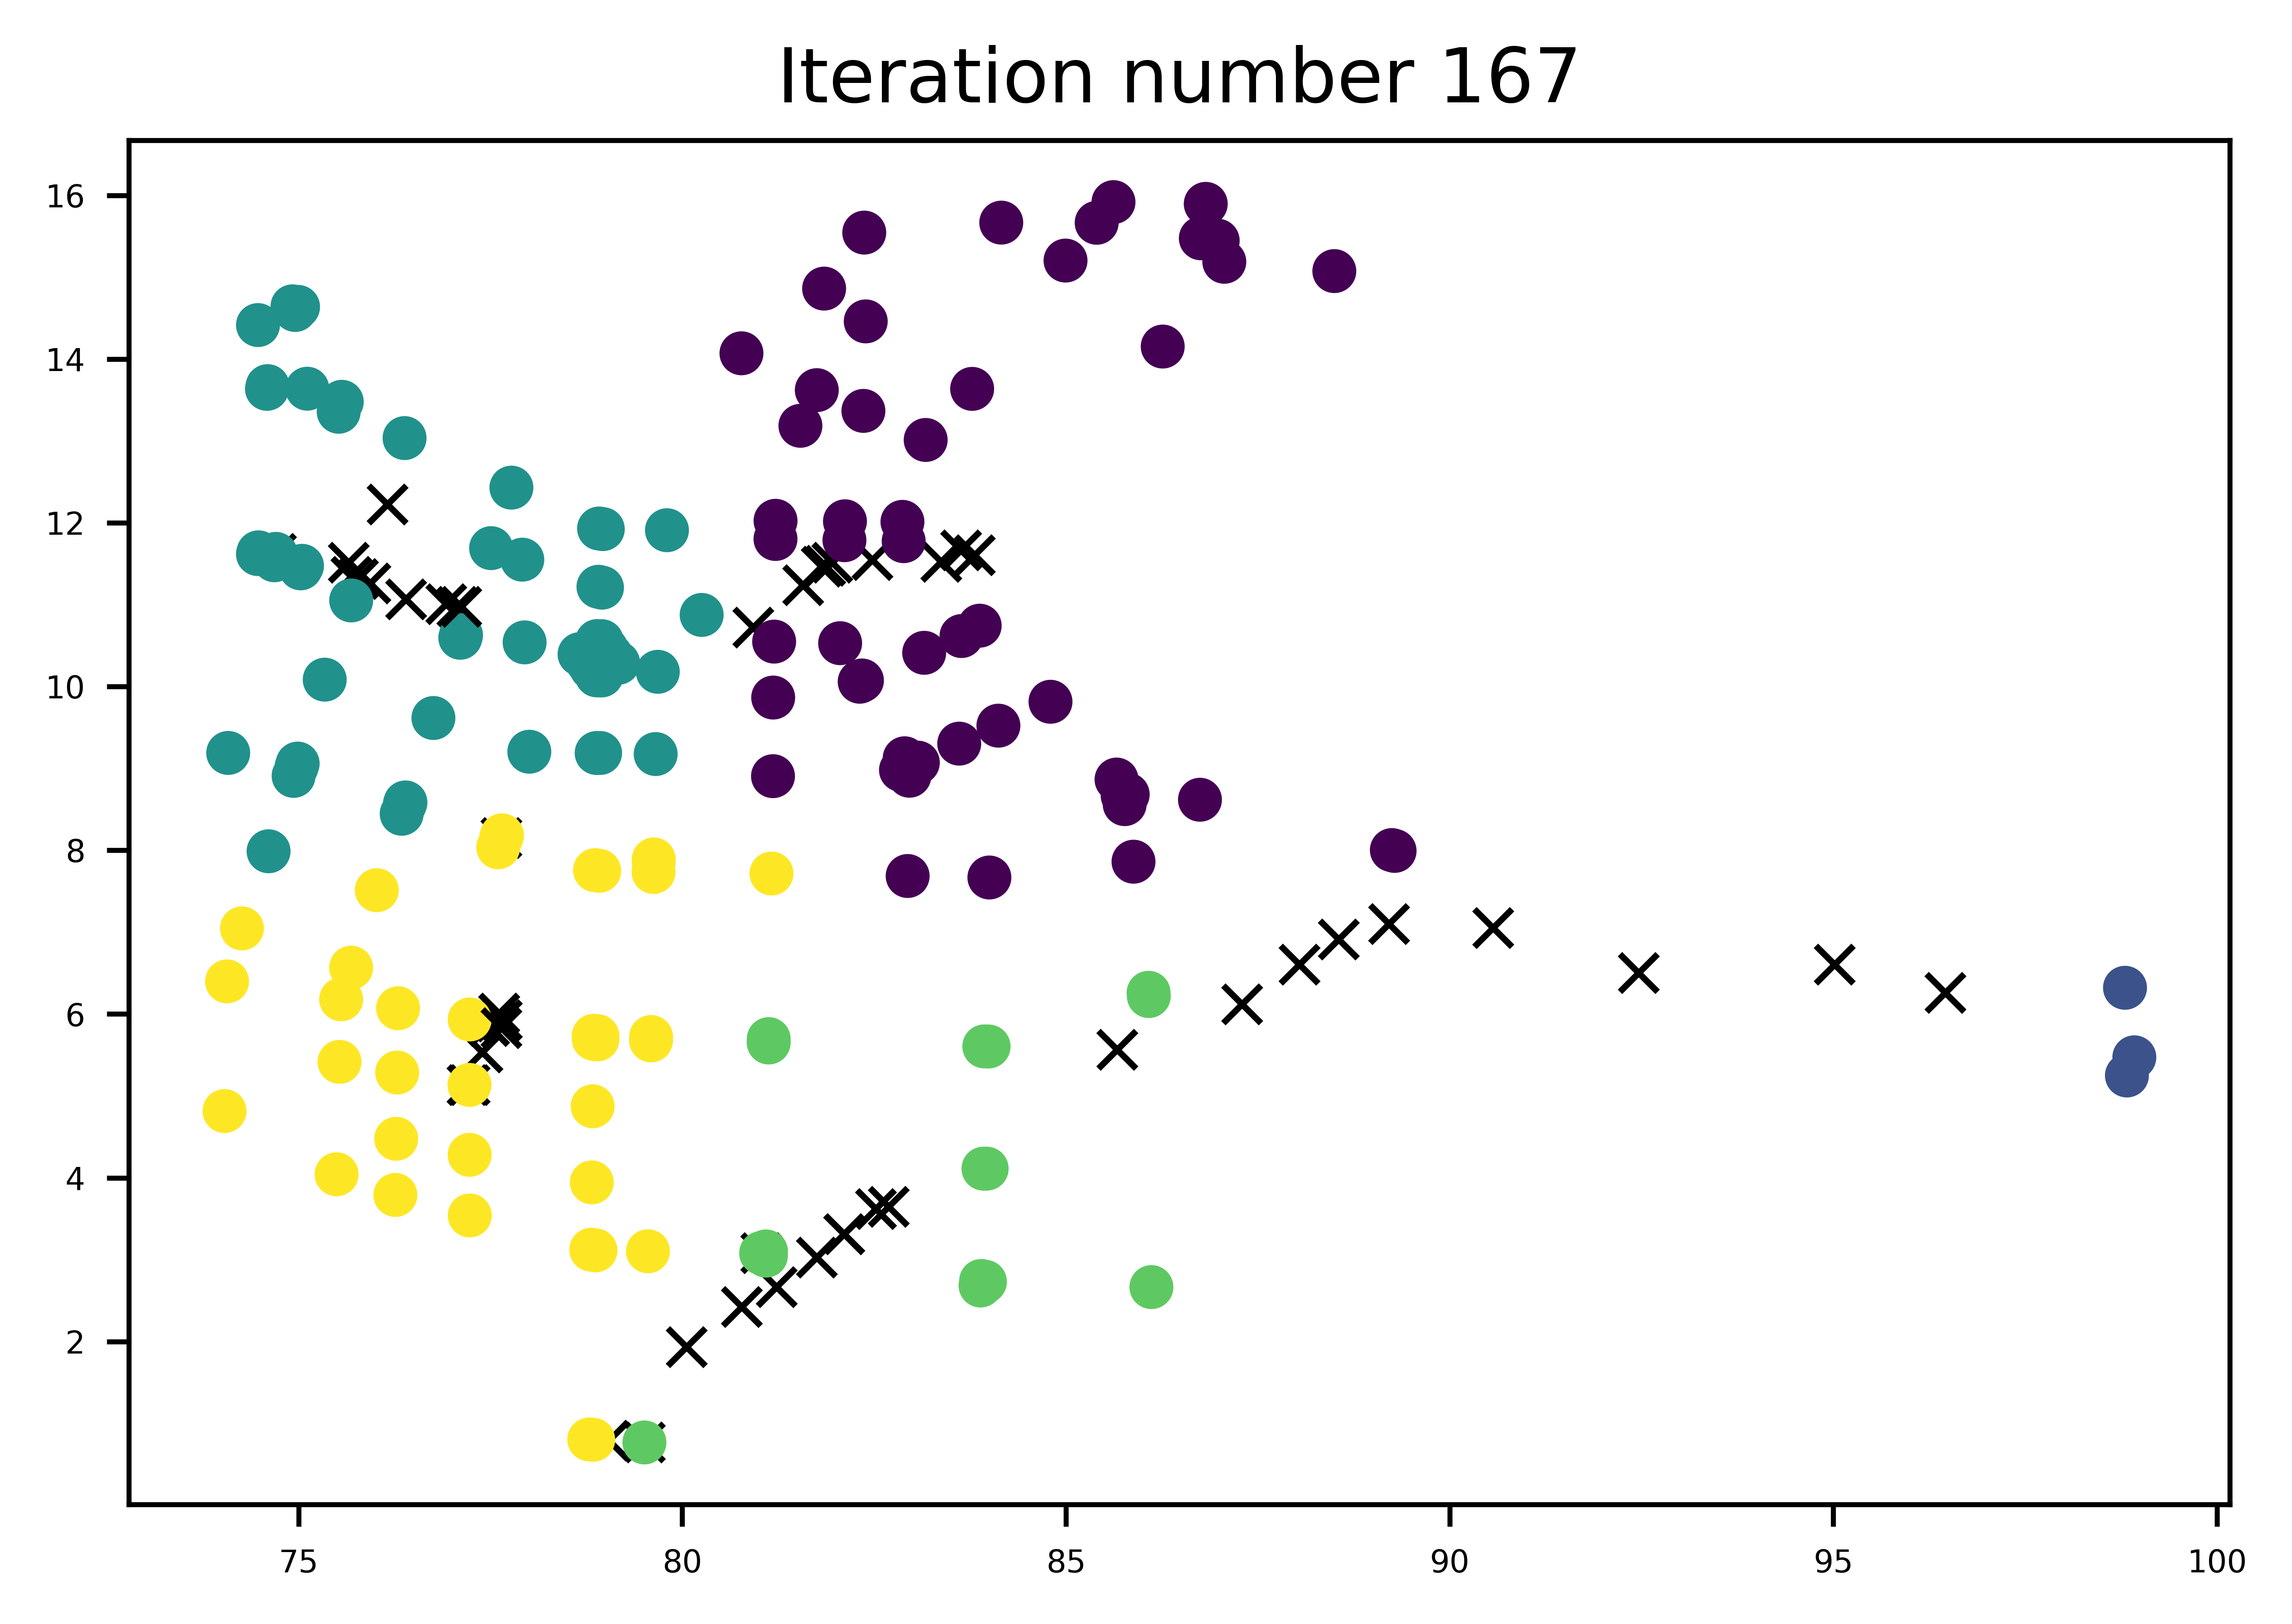

In [14]:
K_blue=5
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
blue_centroids, blue_idx = kMeans(blue[:,1:3],K_blue,choose='blue')
plt.show()

In [15]:
red_closest=[]
for i in range(red_centroids.shape[0]):
    id=closest_node(red_centroids[i],red,blue,choose='red')[0]
    red_closest=np.append(red_closest,[red[id]])

#预选的红方指挥中心的位置
red_center=red_closest.reshape(red_centroids.shape[0],5)



#plt.plot(red_closest.reshape(red_centroids.shape[0],5)[:,1],red_closest.reshape(red_centroids.shape[0],5)[:,2],'.')


In [16]:
blue_closest=[]
for i in range(blue_centroids.shape[0]):
    id=closest_node(blue_centroids[i],blue,blue,choose='blue')[0]
    blue_closest=np.append(blue_closest,[blue[id]])

#预选的红方指挥中心的位置
blue_center=blue_closest.reshape(blue_centroids.shape[0],5)



#plt.plot(blue_closest.reshape(blue_centroids.shape[0],5)[:,1],blue_closest.reshape(blue_centroids.shape[0],5)[:,2],'.')


In [17]:
def gaussian(X,sigma=1):
    X=X.astype('float64')
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-X**2/(2*sigma**2))

In [18]:
gaussian_infantry_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_infantry_sum+=gaussian(closest_node(red_centroids[i],red,blue,choose='red')[1])
red_infantry_sum=np.sum(gaussian_infantry_sum)
red_result=np.array([gaussian_infantry_sum/red_infantry_sum*1250000,])
#print(red_result.astype('int'))

gaussian_tank_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_tank_sum+=gaussian(closest_node(red_centroids[i],red,blue,choose='red')[1],sigma=0.8)
red_tank_sum=np.sum(gaussian_tank_sum)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*180],axis=0)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*300],axis=0)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*420],axis=0)
#print(red_result.astype('int'))

gaussian_gun_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_gun_sum+=gaussian(np.abs(red[:,2]-side)/ratio,sigma=5.14)
red_gun_sum=np.sum(gaussian_gun_sum)
red_result=np.append(red_result,[gaussian_gun_sum/red_gun_sum*7000],axis=0)

#判断误差，确定sigma的值
judge1=red_result[4].astype('int')!=0
judge2=np.abs(red[:,2]-side)/ratio<17.23
Falsesum=0
for i in range(judge1.shape[0]):
    if(judge1[i]!=judge2[i]):
        Falsesum+=1
print("Cost: %d"%Falsesum)



red_result=red_result.T.astype('int')

red_result=np.append(red,red_result,axis=1)

Cost: 0


In [19]:
gaussian_infantry_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_infantry_sum+=gaussian(closest_node(blue_centroids[i],blue,blue,choose='blue')[1])
blue_infantry_sum=np.sum(gaussian_infantry_sum)
blue_result=np.array([gaussian_infantry_sum/blue_infantry_sum*1000000,])
#print(blue_result.astype('int'))

gaussian_tank_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_tank_sum+=gaussian(closest_node(blue_centroids[i],blue,blue,choose='blue')[1],sigma=0.8)
blue_tank_sum=np.sum(gaussian_tank_sum)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*340],axis=0)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*570],axis=0)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*800],axis=0)
#print(blue_result.astype('int'))

gaussian_gun_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_gun_sum+=gaussian(np.abs(blue[:,2]-side)/ratio,sigma=3.6)
blue_gun_sum=np.sum(gaussian_gun_sum)
blue_result=np.append(blue_result,[gaussian_gun_sum/blue_gun_sum*14000],axis=0)

#判断误差，确定sigma的值
judge1=blue_result[4].astype('int')!=0
judge2=np.abs(blue[:,2]-side)/ratio<13.25
Falsesum=0
for i in range(judge1.shape[0]):
    if(judge1[i]!=judge2[i]):
        Falsesum+=1
print("Cost: %d"%Falsesum)



blue_result=blue_result.T.astype('int')

blue_result=np.append(blue,blue_result,axis=1)

Cost: 0


In [20]:
print(np.where(red[:,0]==250))
print(np.where(red[:,0]==136))
print(np.where(red[:,0]==185))
print(np.where(red[:,0]==316))

(array([147], dtype=int64),)
(array([44], dtype=int64),)
(array([83], dtype=int64),)
(array([192], dtype=int64),)


In [21]:
print(np.where(blue[:,0]==163))
print(np.where(blue[:,0]==383))
print(np.where(blue[:,0]==431))
print(np.where(blue[:,0]==348))
print(np.where(blue[:,0]==49))

(array([99], dtype=int64),)
(array([153], dtype=int64),)
(array([162], dtype=int64),)
(array([137], dtype=int64),)
(array([24], dtype=int64),)


In [22]:
#红方分配
print(red_result)
#蓝方分配
print(blue_result)

[[1 74.6492750000023 25.1005333333344 ... 1 1 0]
 [2 86.2242500000008 16.6076666666678 ... 1 2 191]
 [3 86.0222750000013 16.3790999999994 ... 0 1 234]
 ...
 [425 84.5511750000014 21.5383999999996 ... 0 0 0]
 [426 84.5064250000007 23.6142666666671 ... 0 0 0]
 [427 85.6097250000012 24.1956000000011 ... 0 0 0]]
[[25 84.0019250000026 7.66740000000018 ... 0 0 0]
 [26 83.6087750000019 9.30226666666556 ... 0 0 0]
 [27 83.1522749999998 10.4116 ... 8 11 0]
 ...
 [434 78.8388750000024 0.800533333332965 ... 0 0 0]
 [435 75.044400000003 11.4740666666672 ... 0 1 0]
 [436 74.4767500000023 11.6387666666663 ... 0 0 0]]


In [23]:
#红方指挥中心基本状况&兵力
print(red_result[[147,44,83,192],:])
#蓝方指挥中心基本状况&兵力
print(blue_result[[99,153,162,137,24],:])

[[250 85.6124250000008 18.5061333333323 'red' 0.57 16808 3 5 7 1]
 [136 75.6383000000014 24.0935666666668 'red' 0.44 3367 0 0 0 0]
 [185 83.2127000000007 24.7399666666676 'red' 0.3 22283 4 8 11 0]
 [316 77.8452500000029 27.8028333333324 'red' 0.55 664 0 0 0 0]]
[[163 77.1167000000013 10.6264333333333 'blue' 0.74 35862 18 31 43 0]
 [383 83.9250250000028 4.11146666666677 'blue' 0.91 28580 13 21 30 0]
 [431 77.2267500000012 5.13436666666678 'blue' 0.65 31038 14 24 34 0]
 [348 98.9221250000014 5.47139999999994 'blue' 0.65 37195 19 32 46 0]
 [49 83.8754750000028 10.7428333333341 'blue' 0.07 27762 12 20 29 0]]


In [25]:
#写文件
data1=pd.DataFrame(red_result)
data2=pd.DataFrame(blue_result)
data3=pd.DataFrame(red_result[[147,44,83,192],:])
data4=pd.DataFrame(blue_result[[99,153,162,137,24],:])

writer=pd.ExcelWriter('Q1_outputs.xlsx')
data1.to_excel(writer,'red_result',float_format='%.5f')
data2.to_excel(writer,'blue_result',float_format='%.5f')
data3.to_excel(writer,'red_center',float_format='%.5f')
data4.to_excel(writer,'blue_center',float_format='%.5f')

writer.save()
